In [25]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import h5py
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable

font = {'family' : 'serif', 'size'   : 20}
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['legend.fontsize'] = 20
mpl.rcParams['legend.handlelength'] = 2
mpl.rc('font', **font)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from nbodykit.lab import *

Nmodel="Tree_Neig"
size=128
log=True

In [2]:
filename='data_HMass-DenDM_s'+str(size)+'.h5'
print(filename)
f = h5py.File(filename, 'r')
headers=list(f.keys())
print(headers)
print(f['DMD'].shape)
print(f['HM'].shape)
DMD=f['DMD']
DMD=np.array(DMD)
HM=f['HM']
HM=np.array(HM)
f.close()

data_HMass-DenDM_s128.h5
['DMD', 'HM', 'nx', 'ny', 'nz']
(2097152,)
(2097152,)


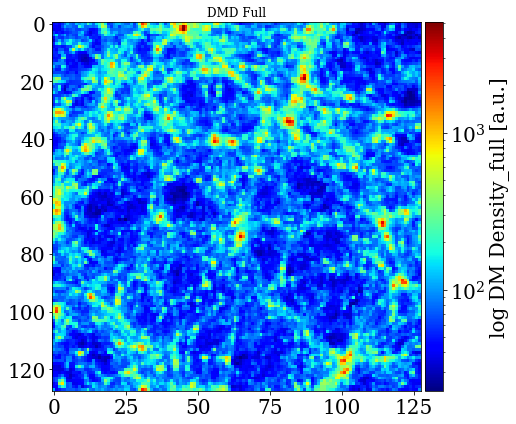

In [3]:
fig = plt.figure(figsize=(7, 7))
plt.jet()
plt.title("DMD Full")
ax=plt.gca()
DMD_full=DMD.reshape(size,size,size)
mesh = ArrayMesh(DMD_full, BoxSize=1.0)
if log!=True:
    plt.imshow(mesh.preview(axes=[0,1]))
else:
    plt.imshow(mesh.preview(axes=[0,1]),norm=mpl.colors.LogNorm())
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=plt.colorbar(cax=cax)
cbar.ax.set_ylabel('log DM Density_full [a.u.]', size=20)
plt.show()

/home/toshiba/Software/Anaconda3/lib/python3.6/site-packages/nbodykit/algorithms/fftpower.py:610: RuntimeWarning: invalid value encountered in sqrt
  xslab **= 0.5


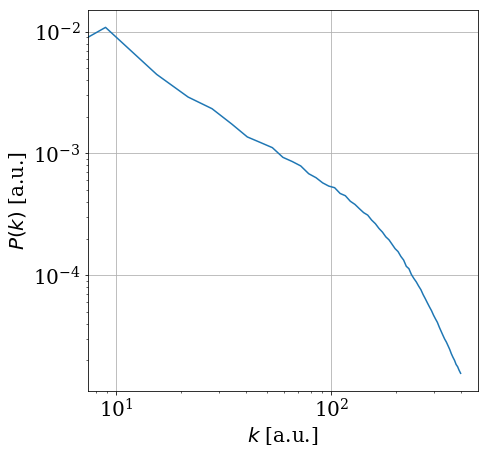

In [4]:
r = FFTPower(mesh, mode='1d')# the result is stored at "power" attribute
Pk = r.power
# print(Pk)
# print(Pk.coords)
# print out the meta-data
# for k in Pk.attrs:
#     print("%s = %s" %(k, str(Pk.attrs[k])))
# print the shot noise subtracted P(k)
fig=plt.figure(figsize=(7,7))
plt.loglog(Pk['k'], Pk['power'].real - Pk.attrs['shotnoise'])
plt.grid()
# format the axes
plt.xlabel(r"$k$ [a.u.]",size=20)
plt.ylabel(r"$P(k)$ [a.u.]",size=20)
plt.savefig('./Figures_data_HMass-DenDM/'+Nmodel+'/PowerSpec_Full_1d_s'+str(size), bbox_inches='tight')
plt.show()

/home/toshiba/Software/Anaconda3/lib/python3.6/site-packages/nbodykit/algorithms/fftpower.py:610: RuntimeWarning: invalid value encountered in sqrt
  xslab **= 0.5


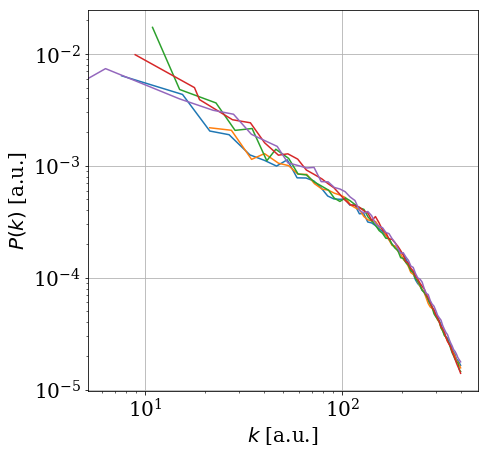

In [5]:
r = FFTPower(mesh, mode='2d')# the result is stored at "power" attribute
Pk = r.power
# print(Pk)
# print(Pk.coords)
# print out the meta-data
# for k in Pk.attrs:
#     print("%s = %s" %(k, str(Pk.attrs[k])))
# print the shot noise subtracted P(k)
fig=plt.figure(figsize=(7,7))
plt.loglog(Pk['k'], Pk['power'].real - Pk.attrs['shotnoise'])
plt.grid()
# format the axes
plt.xlabel(r"$k$ [a.u.]",size=20)
plt.ylabel(r"$P(k)$ [a.u.]",size=20)
plt.savefig('./Figures_data_HMass-DenDM/'+Nmodel+'/PowerSpec_Full_2d_s'+str(size), bbox_inches='tight')
plt.show()

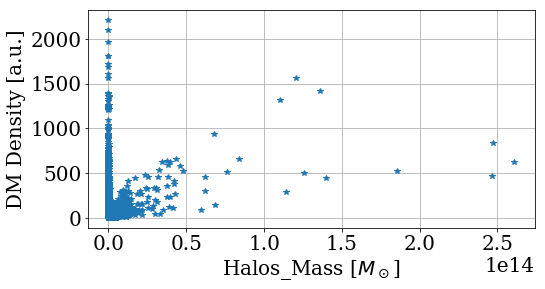

In [6]:
fig = plt.figure(figsize=(8, 4))
plt.plot(HM,DMD,"*")
plt.xlabel('Halos_Mass [$M_\odot$]',size=20)
plt.ylabel('DM Density [a.u.]',size=20)
plt.grid()
plt.savefig('./Figures_data_HMass-DenDM/'+Nmodel+'/'+Nmodel+'_DMD_HM_full_s'+str(size), bbox_inches = 'tight')
plt.show()

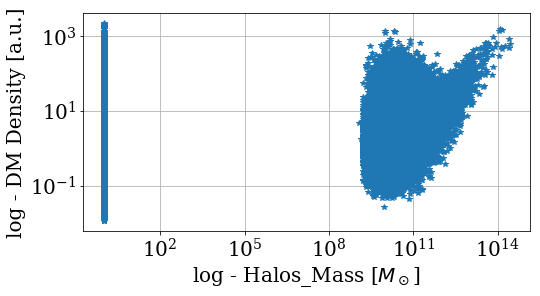

In [7]:
fig = plt.figure(figsize=(8, 4))
plt.plot(HM,DMD,"*")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("log - Halos_Mass [$M_\odot$]",size=20)
plt.ylabel("log - DM Density [a.u.]",size=20)
plt.grid()
plt.savefig('./Figures_data_HMass-DenDM/'+Nmodel+'/'+Nmodel+'_logDMD_logHM_full_s'+str(size), bbox_inches = 'tight')
plt.show()

In [8]:
filename='data_HMass-DenDM_s'+str(size)+'_V.h5'
print(filename)
f = h5py.File(filename, 'r')
headers=list(f.keys())
print(headers)
print(f['DMD'].shape)
print(f['HM'].shape)
DMD=f['DMD']
DMD=np.array(DMD)
HM=f['HM']
HM=np.array(HM)
f.close()

data_HMass-DenDM_s128_V.h5
['DMD', 'HM']
(128, 128, 128)
(128, 128, 128)


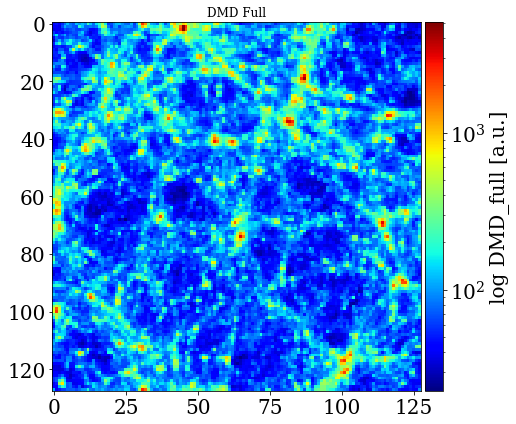

In [9]:
fig = plt.figure(figsize=(7, 7))
plt.jet()
plt.title("DMD Full")
ax=plt.gca()
mesh = ArrayMesh(DMD_full, BoxSize=1.0)
if log!=True:
    plt.imshow(mesh.preview(axes=[0,1]))
else:
    plt.imshow(mesh.preview(axes=[0,1]),norm=mpl.colors.LogNorm())
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=plt.colorbar(cax=cax)
cbar.ax.set_ylabel('log DMD_full [a.u.]', size=20)

plt.savefig('./Figures_data_HMass-DenDM/'+Nmodel+'/'+Nmodel+'_DMD_full_s'+str(size), bbox_inches = 'tight')
plt.show()

In [10]:
train=0.5
lim=int(size*train)

if log==True and (max(HM.ravel())>1000):
    HM=np.log10(HM)
    DMD=np.log10(DMD)

HM_train=[]
HM_test=[]
DMD_train=[]
DMD_test=[]

HM_slice=[]
HM_slicei1=[]
HM_slicej1=[]
HM_slicei_1=[]
HM_slicej_1=[]
DMD_slice=[]


HMi1_train=[]
HMi_1_train=[]
HMj1_train=[]
HMj_1_train=[]
HMk1_train=[]
HMk_1_train=[]

HMi1_test=[]
HMi_1_test=[]
HMj1_test=[]
HMj_1_test=[]
HMk1_test=[]
HMk_1_test=[]

for i in range(0,size):
    for j in range(0,size):
        for k in range(0,size):
            if k<lim:
                HM_train.append(HM[i][j][k])
                DMD_train.append(DMD[i][j][k])
                if i!=0:
                    HMi_1_train.append(HM[i-1][j][k])
                else:
                    HMi_1_train.append(1)
                if j!=0:
                    HMj_1_train.append(HM[i][j-1][k])
                else:
                    HMj_1_train.append(1)
                if k!=0:
                    HMk_1_train.append(HM[i][j][k-1])
                else:
                    HMk_1_train.append(1)
                if i!=size-1:
                    HMi1_train.append(HM[i+1][j][k])
                else:
                    HMi1_train.append(0)
                if j!=size-1:
                    HMj1_train.append(HM[i][j+1][k])
                else:
                    HMj1_train.append(0)
                if k!=size-1:
                    HMk1_train.append(HM[i][j][k+1])
                else:
                    HMk1_train.append(0)
            else:    
                HM_test.append(HM[i][j][k])
                DMD_test.append(DMD[i][j][k])
                if i!=0:
                    HMi_1_test.append(HM[i-1][j][k])
                else:
                    HMi_1_test.append(0)
                if j!=0:
                    HMj_1_test.append(HM[i][j-1][k])
                else:
                    HMj_1_test.append(0)
                if k!=0:
                    HMk_1_test.append(HM[i][j][k-1])
                else:
                    HMk_1_test.append(0)
                if i!=size-1:
                    HMi1_test.append(HM[i+1][j][k])
                else:
                    HMi1_test.append(0)
                if j!=size-1:
                    HMj1_test.append(HM[i][j+1][k])
                else:
                    HMj1_test.append(0)
                if k!=size-1:
                    HMk1_test.append(HM[i][j][k+1])
                else:
                    HMk1_test.append(0)
                
            if k>int(size/2) and k<int(size/2)+2:
                HM_slice.append(HM[i][j][k])
                DMD_slice.append(DMD[i][j][k])
                if i!=0:
                    HM_slicei_1.append(HM[i-1][j][k])
                else:
                    HM_slicei_1.append(0)
                if j!=0:
                    HM_slicej_1.append(HM[i][j-1][k])
                else:
                    HM_slicej_1.append(0)
                if i!=size-1:
                    HM_slicei1.append(HM[i+1][j][k])
                else:
                    HM_slicei1.append(0)
                if j!=size-1:
                    HM_slicej1.append(HM[i][j+1][k])
                else:
                    HM_slicej1.append(0)                    
                
                             
                    
HM_train=np.array(HM_train)
DMD_train=np.array(DMD_train)
HM_test=np.array(HM_test)
DMD_test=np.array(DMD_test)
HM_slice=np.array(HM_slice)
DMD_slice=np.array(DMD_slice)

print(HM_train.shape)
print(DMD_train.shape)
print(HM_test.shape)
print(DMD_test.shape)

(1048576,)
(1048576,)
(1048576,)
(1048576,)


                if i!=0 and j!=0:
                    HMi_1_j_1_train.append(HM[i-1][j-1][k])
                else:
                    HMi_1_j_1_train.append(0)
                if i!=0 and k!=0:
                    HMi_1_k_1_train.append(HM[i-1][j][k-1])
                else:
                    HMi_1_k_1_train.append(0)                    
                if k!=0 and j!=0:
                    HMj_1_k_1_train.append(HM[i-1][j-1][k])
                else:
                    HMi_1_j_1_train.append(0)                    
                    


In [11]:
HM_train_neig = pd.DataFrame({'HM':HM_train,'HMi+1':HMi1_train,'HMi-1':HMi_1_train,'HMj+1':HMj1_train,'HMj-1':HMj_1_train,'HMk+1':HMk1_train,'HMk-1':HMk_1_train})
HM_test_neig = pd.DataFrame({'HM':HM_test,'HMi+1':HMi1_test,'HMi-1':HMi_1_test,'HMj+1':HMj1_test,'HMj-1':HMj_1_test,'HMk+1':HMk1_test,'HMk-1':HMk_1_test})
HM_slice_neig = pd.DataFrame({'HM':HM_slice,'HMi+1':HM_slicei1,'HMi-1':HM_slicei_1,'HMj+1':HM_slicej1,'HMj-1':HM_slicej_1})

# HM_train_neig = pd.DataFrame({'HM':HM_train,'HMi1':HMi1_train})
print(HM_train_neig.shape)

(1048576, 7)


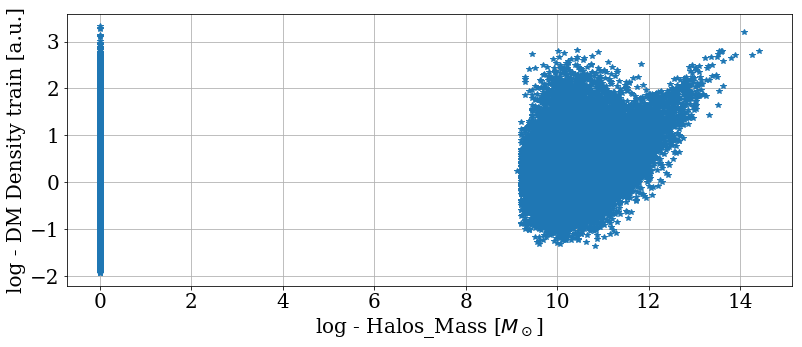

In [12]:
fig = plt.figure(figsize=(13, 5))
plt.plot(HM_train.ravel(),DMD_train.ravel(),"*")
if log!=True:
    plt.xscale('log')
    plt.yscale('log')
plt.xlabel("log - Halos_Mass [$M_\odot$]",size=20)
plt.ylabel("log - DM Density train [a.u.]",size=20)
plt.grid()
plt.savefig('./Figures_data_HMass-DenDM/'+Nmodel+'/'+Nmodel+'_logDMD_logHM_train_s'+str(size), bbox_inches = 'tight')
plt.show()

In [13]:
# clf = DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort=False, random_state=None, splitter='best')
X=HM_train_neig[['HM','HMi+1','HMi-1','HMj+1','HMj-1','HMk+1','HMk-1']]
y=DMD_train
X_test=HM_test_neig[['HM','HMi+1','HMi-1','HMj+1','HMj-1','HMk+1','HMk-1']]

print(X.shape)
print(y.shape)
print(X_test.shape)

clf = DecisionTreeRegressor(max_depth=4)
clf.fit(X,y)
DMD_pred=clf.predict(X_test)

(1048576, 7)
(1048576,)
(1048576, 7)


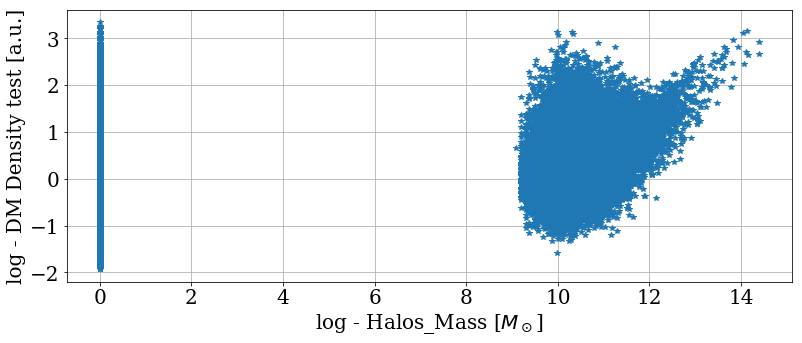

In [14]:
fig = plt.figure(figsize=(13, 5))
plt.plot(HM_test.ravel(),DMD_test.ravel(),"*")
plt.xlabel("log - Halos_Mass [$M_\odot$]",size=20)
plt.ylabel("log - DM Density test [a.u.]",size=20)
plt.grid()
plt.savefig('./Figures_data_HMass-DenDM/'+Nmodel+'/'+Nmodel+'_logDMD_logHM_test_s'+str(size), bbox_inches = 'tight')
plt.show()

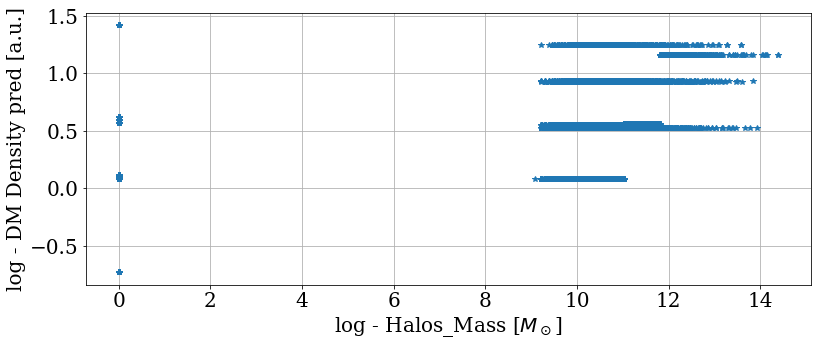

In [15]:
fig = plt.figure(figsize=(13, 5))
plt.plot(HM_test.ravel(),DMD_pred.ravel(),"*")
if log!=True:
    plt.xscale('log')
    plt.yscale('log')
plt.xlabel("log - Halos_Mass [$M_\odot$]",size=20)
plt.ylabel("log - DM Density pred [a.u.]",size=20)
plt.grid()
plt.savefig('./Figures_data_HMass-DenDM/'+Nmodel+'/'+Nmodel+'_logDMD_logHM_pred_s'+str(size), bbox_inches = 'tight')
plt.show()

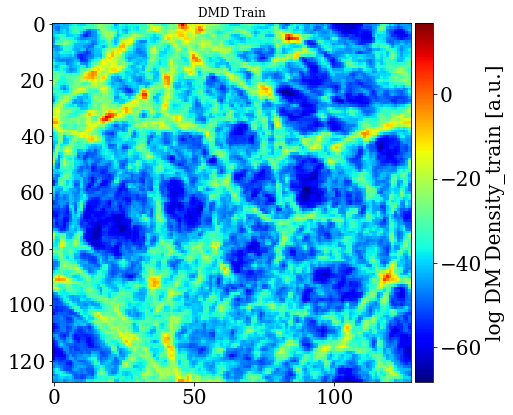

In [16]:
fig = plt.figure(figsize=(15, 7))
plt.jet()
plt.subplot(121)
plt.title("DMD Train")
DMD_trainp=DMD_train.reshape(size,size,round(size*train))
mesh = ArrayMesh(DMD_trainp, BoxSize=1.0)
if log!=True:
    plt.imshow(mesh.preview(axes=[0,1]),norm=mpl.colors.LogNorm())
else:
    plt.imshow(mesh.preview(axes=[0,1]))
ax=plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=plt.colorbar(cax=cax)
cbar.ax.set_ylabel('log DM Density_train [a.u.]', size=20)

plt.savefig('./Figures_data_HMass-DenDM/'+Nmodel+'/'+Nmodel+'_DMD_HM_train_s'+str(size), bbox_inches = 'tight')

plt.show()

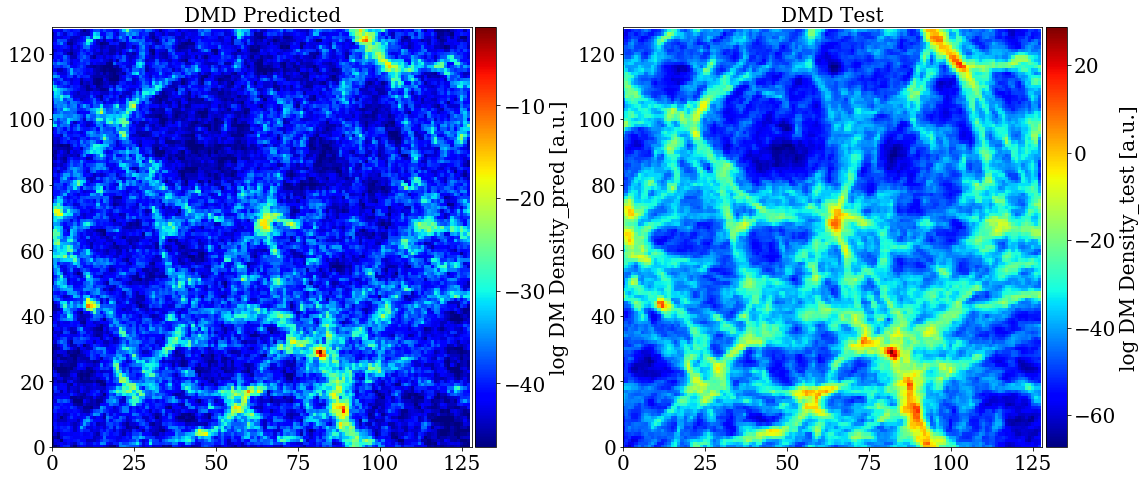

(128, 128)


In [17]:
fig = plt.figure(figsize=(16, 7))
plt.jet()
plt.subplot(121)
plt.title("DMD Predicted",size=20)
DMD_predp=DMD_pred.reshape(size,size,round(size*(1-train)))
mesh_pred = ArrayMesh(DMD_predp, BoxSize=1.0)
if log!=True:
    plt.imshow(mesh_pred.preview(axes=[0,1]),norm=mpl.colors.LogNorm())
else:
    plt.imshow(mesh_pred.preview(axes=[0,1]))
plt.xlim(0,size)
plt.ylim(0,size)
ax=plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=plt.colorbar(cax=cax)
cbar.ax.set_ylabel('log DM Density_pred [a.u.]', size=20)

plt.subplot(122)
plt.title("DMD Test",size=20)
DMD_testp=DMD_test.reshape(size,size,round(size*(1-train)))
mesh_test = ArrayMesh(DMD_testp, BoxSize=1.0)
if log!=True:
    plt.imshow(mesh_test.preview(axes=[0,1]),norm=mpl.colors.LogNorm())
else:
    plt.imshow(mesh_test.preview(axes=[0,1]))
plt.xlim(0,size)
plt.xlim(0,size)
plt.ylim(0,size)
ax=plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=plt.colorbar(cax=cax)
cbar.ax.set_ylabel('log DM Density_test [a.u.]', size=20)

plt.tight_layout()
plt.savefig('./Figures_data_HMass-DenDM/'+Nmodel+'/'+Nmodel+'_DMD_HM_pred_s'+str(size), bbox_inches = 'tight')
plt.show()
print(DMD_testp[:,:,0].shape)

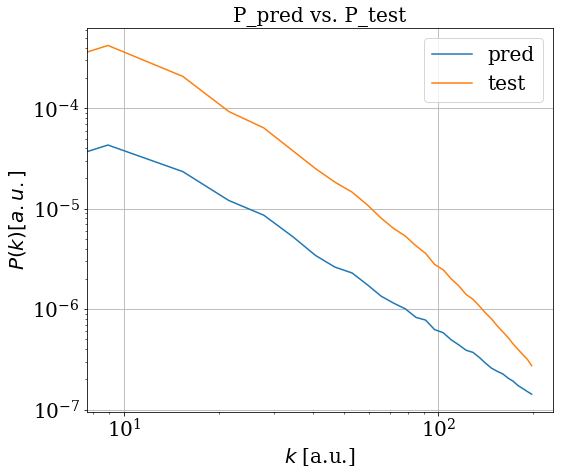

In [26]:
r_pred = FFTPower(mesh_pred, mode='1d')# the result is stored at "power" attribute
Pk_pred = r_pred.power
r_test = FFTPower(mesh_test, mode='1d')# the result is stored at "power" attribute
Pk_test = r_test.power

fig=plt.figure(figsize=(15,7))
plt.subplot(121)
plt.title("P_pred vs. P_test",size=20)
plt.loglog(Pk_pred['k'], Pk_pred['power'].real - Pk_pred.attrs['shotnoise'] , label="pred")
plt.loglog(Pk_test['k'], Pk_test['power'].real - Pk_test.attrs['shotnoise'], label="test")
plt.grid()
plt.legend()
# format the axes
plt.xlabel(r"$k$ [a.u.]",size=20)
plt.ylabel(r"$P(k) [a.u.]$",size=20)
plt.tight_layout()

plt.savefig('./Figures_data_HMass-DenDM/'+Nmodel+'/PowerSpec_pred_1d_s'+str(size), bbox_inches='tight')

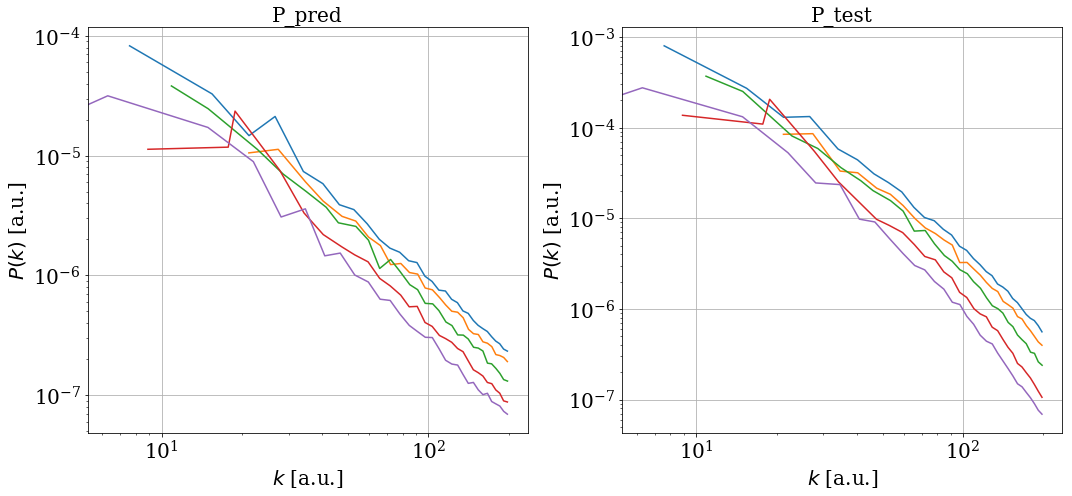

In [19]:
r_pred = FFTPower(mesh_pred, mode='2d')# the result is stored at "power" attribute
Pk_pred = r_pred.power
r_test = FFTPower(mesh_test, mode='2d')# the result is stored at "power" attribute
Pk_test = r_test.power

fig=plt.figure(figsize=(15,7))
plt.subplot(121)
plt.title("P_pred",size=20)
plt.loglog(Pk_pred['k'], Pk_pred['power'].real - Pk_pred.attrs['shotnoise'])
plt.grid()
# format the axes
plt.xlabel(r"$k$ [a.u.]",size=20)
plt.ylabel(r"$P(k)$ [a.u.]",size=20)
plt.subplot(122)
plt.title("P_test",size=20)
plt.loglog(Pk_test['k'], Pk_test['power'].real - Pk_test.attrs['shotnoise'])
plt.grid()
# format the axes
plt.xlabel(r"$k$ [a.u.]",size=20)
plt.ylabel(r"$P(k)$ [a.u.]",size=20)
plt.tight_layout()

plt.savefig('./Figures_data_HMass-DenDM/'+Nmodel+'/PowerSpec_pred_2d_s'+str(size), bbox_inches='tight')

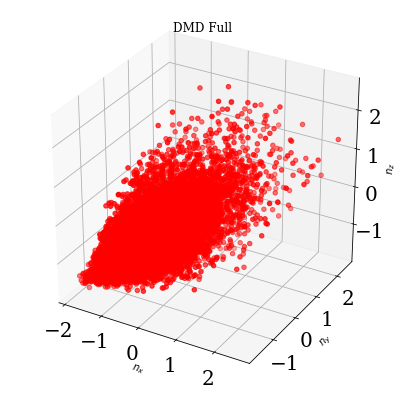

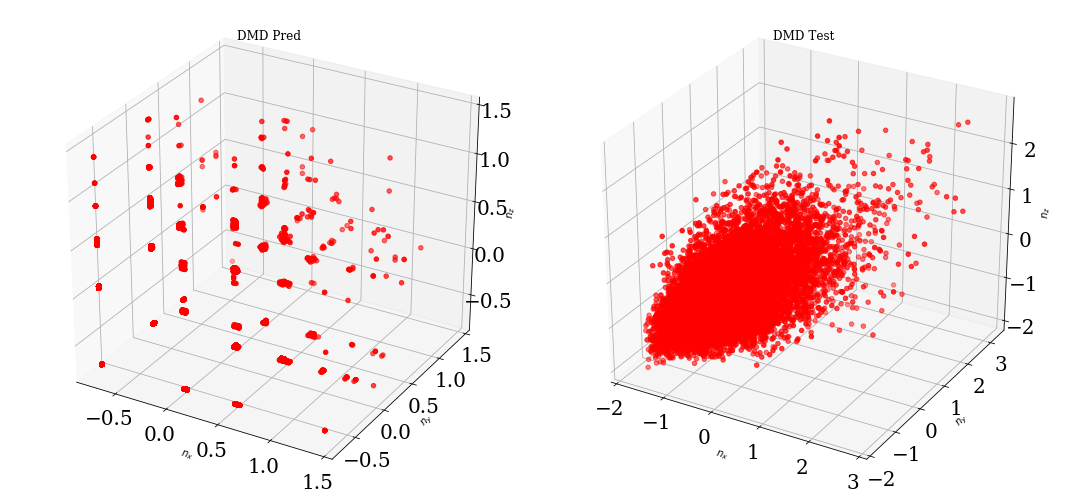

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = fig.gca(projection='3d')
plt.title("DMD Full")
ax.scatter(DMD[:,:,0], DMD[:,:,1], DMD[:,:,2], c='red')
ax.set_xlabel('$n_x$')
ax.set_ylabel('$n_y$')
ax.set_zlabel('$n_z$')
plt.show()

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(122, projection='3d')
plt.title("DMD Test")
ax.scatter(DMD_testp[:,:,0], DMD_testp[:,:,1], DMD_testp[:,:,2], c='red')
ax.set_xlabel('$n_x$')
ax.set_ylabel('$n_y$')
ax.set_zlabel('$n_z$')
ax = fig.add_subplot(121, projection='3d')
plt.title("DMD Pred")
ax.scatter(DMD_predp[:,:,0], DMD_predp[:,:,1], DMD_predp[:,:,2], c='red')
ax.set_xlabel('$n_x$')
ax.set_ylabel('$n_y$')
ax.set_zlabel('$n_z$')
plt.tight_layout()
# plt.savefig('./Figures_data_HMass-DenDM/'+Nmodel+'_DMD_scatter', bbox_inches = 'tight')
plt.show()

In [21]:
# clf = DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort=False, random_state=None, splitter='best')
X=HM_train_neig[['HM','HMi+1','HMi-1','HMj+1','HMj-1']]
y=DMD_train
X_test=HM_slice_neig[['HM','HMi+1','HMi-1','HMj+1','HMj-1']]

print(X.shape)
print(y.shape)
print(X_test.shape)

clf = DecisionTreeRegressor(max_depth=4)
clf.fit(X,y)
DMD_slicepred=clf.predict(X_test)

(1048576, 5)
(1048576,)
(16384, 5)


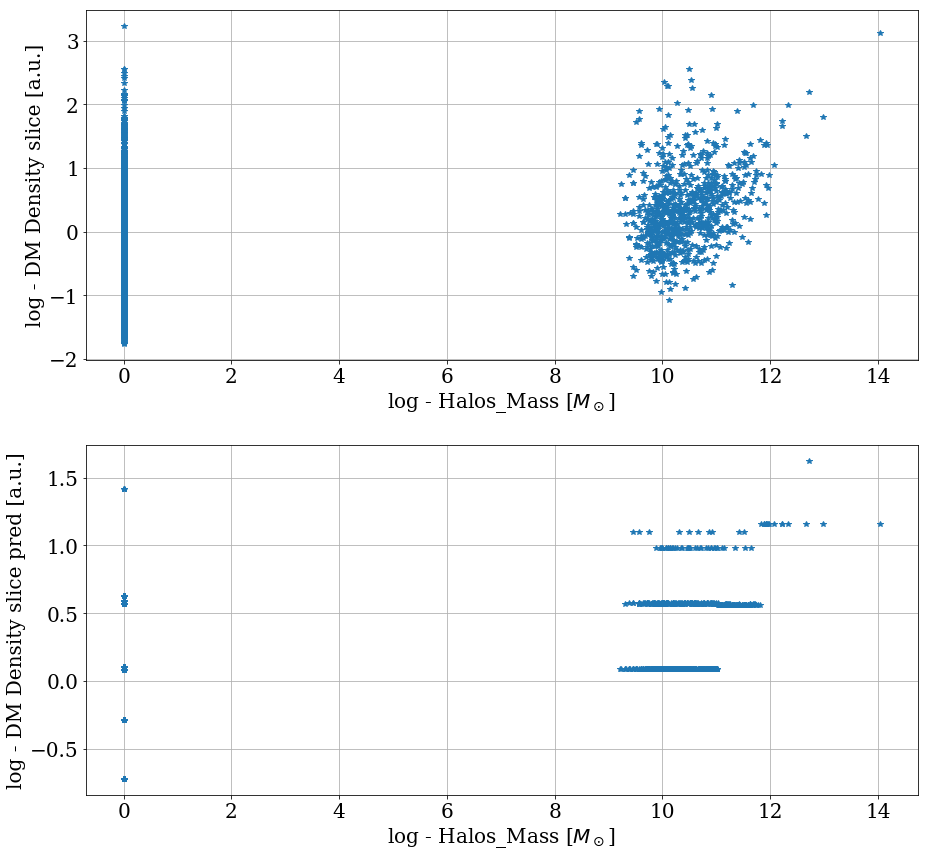

In [22]:
fig = plt.figure(figsize=(13, 12))
plt.subplot(211)
plt.plot(HM_slice.ravel(),DMD_slice.ravel(),"*")
if log!=True:
    plt.xscale('log')
    plt.yscale('log')
plt.xlabel("log - Halos_Mass [$M_\odot$]",size=20)
plt.ylabel("log - DM Density slice [a.u.]",size=20)
plt.grid()
plt.subplot(212)
plt.plot(HM_slice.ravel(),DMD_slicepred.ravel(),"*")
if log!=True:
    plt.xscale('log')
    plt.yscale('log')
plt.xlabel("log - Halos_Mass [$M_\odot$]",size=20)
plt.ylabel("log - DM Density slice pred [a.u.]",size=20)
plt.grid()
plt.savefig('./Figures_data_HMass-DenDM/'+Nmodel+'/'+Nmodel+'_DMD_HM_pred_slice_s'+str(size), bbox_inches = 'tight')
plt.tight_layout()
plt.show()

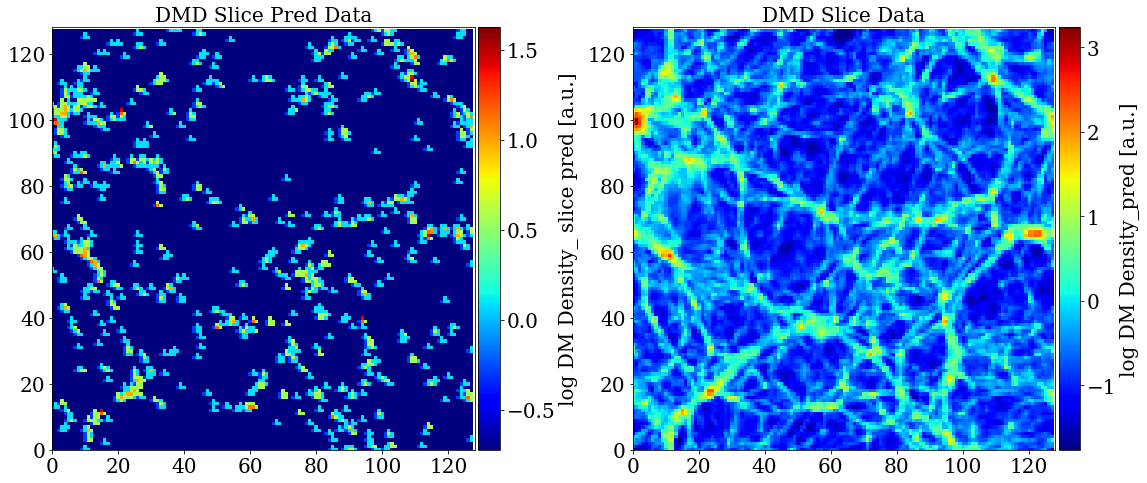

In [23]:
fig = plt.figure(figsize=(16, 7))
plt.subplot(121)
plt.title("DMD Slice Pred Data",size=20)
DMD_slicepredp=DMD_slicepred.reshape(size,size,1)
mesh_slicepred = ArrayMesh(DMD_slicepredp, BoxSize=1.0)
if log!=True:
    plt.imshow(mesh_slicepred.preview(axes=[0,1]),norm=mpl.colors.LogNorm())
else:
    plt.imshow(mesh_slicepred.preview(axes=[0,1]))         
plt.xlim(0,size)
plt.ylim(0,size)
ax=plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=plt.colorbar(cax=cax)
cbar.ax.set_ylabel('log DM Density_ slice pred [a.u.]', size=20)

plt.subplot(122)
plt.title("DMD Slice Data",size=20)
DMD_slicep=DMD_slice.reshape(size,size,1)
mesh_slicetest = ArrayMesh(DMD_slicep, BoxSize=1.0)
if log!=True:
    plt.imshow(mesh_slicetest.preview(axes=[0,1]),norm=mpl.colors.LogNorm())
else:
    plt.imshow(mesh_slicetest.preview(axes=[0,1]))
plt.xlim(0,size)
plt.ylim(0,size)
ax=plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=plt.colorbar(cax=cax)
cbar.ax.set_ylabel('log DM Density_pred [a.u.]', size=20)


plt.tight_layout()
plt.savefig('./Figures_data_HMass-DenDM/'+Nmodel+'/'+Nmodel+'_DMD_pred_slice_s'+str(size), bbox_inches = 'tight')
plt.show()

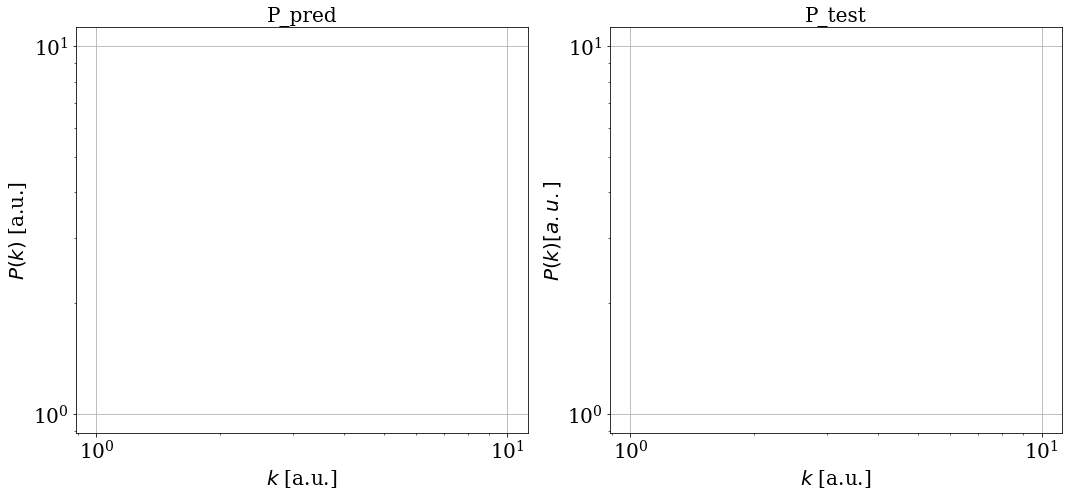

In [24]:
r_pred = FFTPower(mesh_slicepred, mode='1d')# the result is stored at "power" attribute
Pk_pred = r_pred.power
r_test = FFTPower(mesh_slicetest, mode='1d')# the result is stored at "power" attribute
Pk_test = r_test.power

fig=plt.figure(figsize=(15,7))
plt.subplot(121)
plt.title("P_pred",size=20)
plt.loglog(Pk_pred['k'], Pk_pred['power'].real - Pk_pred.attrs['shotnoise'])
plt.grid()
# format the axes
plt.xlabel(r"$k$ [a.u.]",size=20)
plt.ylabel(r"$P(k)$ [a.u.]",size=20)
plt.subplot(122)
plt.title("P_test",size=20)
plt.loglog(Pk_test['k'], Pk_test['power'].real - Pk_test.attrs['shotnoise'])
plt.grid()
# format the axes
plt.xlabel(r"$k$ [a.u.]",size=20)
plt.ylabel(r"$P(k) [a.u.]$",size=20)
plt.tight_layout()

plt.savefig('./Figures_data_HMass-DenDM/'+Nmodel+'/PowerSpec_slice_1d_s'+str(size), bbox_inches='tight')